# Sales Analysis

#### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar
from warnings import filterwarnings
filterwarnings("ignore")

#### Task 1: Merge the 12 months of sales data into a single csv

In [2]:
path = "./SalesData"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

#### Read in updated CSV

In [3]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the Data

#### Drop NAN Values

In [4]:
nan_data = all_data[all_data.isna().any(axis=1)]
nan_data.head()

all_data = all_data.dropna(how="all")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augument Data with additional columns

#### Task 2: Add Month Number Column

In [7]:
all_data["Month Number"]=all_data["Order Date"].str[0:2]
all_data["Month Number"]= all_data["Month Number"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Find "Or" in the Month Number Column and delete it

In [6]:
all_data = all_data[all_data["Month Number"] != "Or"]

#### Convert columns to the correct types

In [8]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int32")
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add Month Name Column

In [9]:
all_data["Month Name"]= all_data["Month Number"].apply(lambda x : calendar.month_name[x])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month Name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April


#### Task 4: Add the sales column

In [10]:
all_data["Sales"]= all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month Name,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99


#### Task 5: Add city column

In [11]:
def getCity(city):
    return city.split(",")[1]

def getState(state):
    return state.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{getCity(x)} ({getState(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month Name,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA)


In [12]:
all_data["Month"] = all_data["Month Name"].apply(lambda x: x[0:3])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month Name,Sales,City,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX),Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA),Apr
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),Apr


#### Question 1: What was the best month for sales? How much was earned in that month?

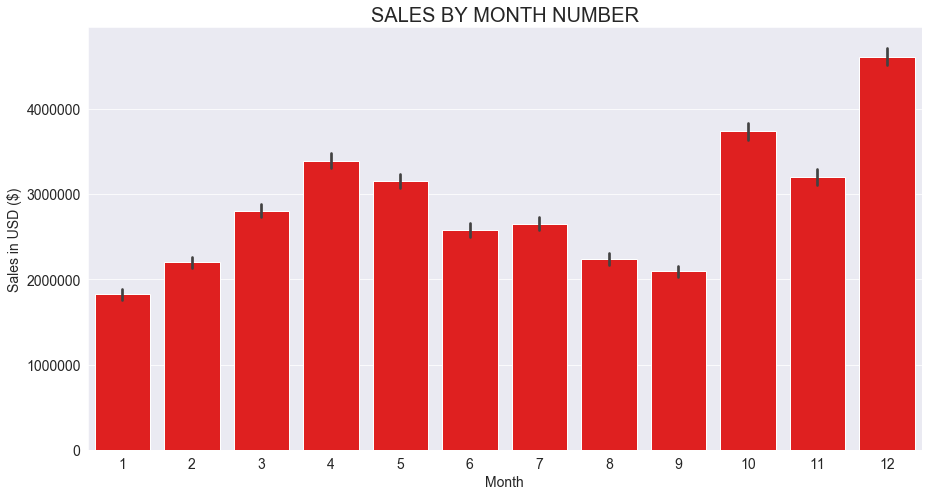

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,7))
sns.barplot(x="Month Number", y="Sales", data=all_data, estimator=np.sum, color="red")
plt.title("SALES BY MONTH NUMBER", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Sales in USD ($)", fontsize=14)
plt.tick_params(axis="x", labelsize = 14)
plt.tick_params(axis="y", labelsize = 14)
plt.xticks(rotation=0)
plt.tight_layout()

#### Question 2: What city had the highest sales?

In [23]:
df2 = all_data.groupby("City").sum().sort_values("Sales")

df2

,Quantity Ordered,Price Each,Month Number,Sales
City,,,,
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06


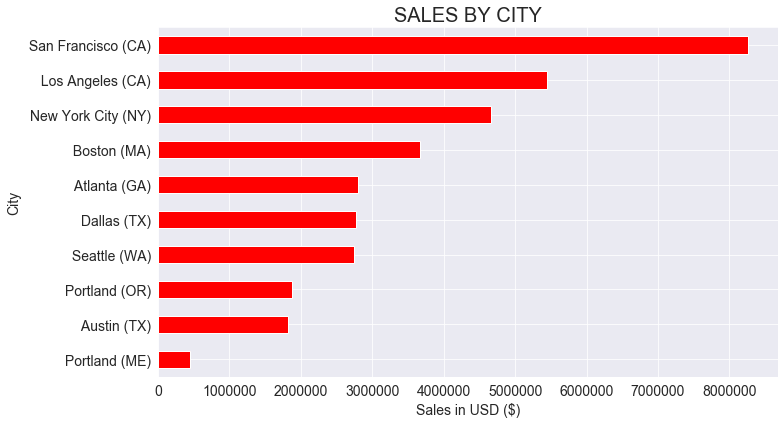

In [24]:
sns.set_style("darkgrid")
df2["Sales"].plot(kind="barh", figsize=(11,6), color="r")
plt.title("SALES BY CITY", fontsize=20)
plt.xlabel("Sales in USD ($)", fontsize=14)
plt.ylabel("City", fontsize=14)
plt.tick_params(axis="x", labelsize = 14)
plt.tick_params(axis="y", labelsize = 14)
plt.xticks(rotation=0)
plt.tight_layout()

#Do not forget to add data labels

#### Question 3: What time should we display advertisements to maximize the likelihood of customer's buying product? 

In [25]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

In [26]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month Name,Sales,City,Month,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX),Apr,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA),Apr,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),Apr,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),Apr,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),Apr,9,27


In [27]:
df3 = all_data.groupby("Hour").sum()

df3

,Quantity Ordered,Price Each,Month Number,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


Text(0.5, 1.0, 'Number of Products Ordered by Hour')

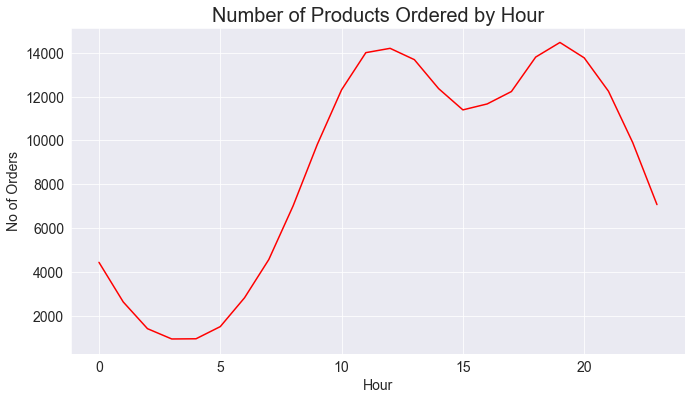

In [28]:
sns.set_style("darkgrid")
df3["Quantity Ordered"].plot(kind="line", figsize=(11,6), color="r")
plt.tick_params(axis="x", labelsize = 14)
plt.tick_params(axis="y", labelsize = 14)
plt.xlabel("Hour", fontsize = 14)
plt.ylabel("No of Orders", fontsize = 14)
plt.title("Number of Products Ordered by Hour", fontsize = 20)

#### Question 4: What products are most often sold together?

In [29]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month Name,Sales,City,Month,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),Apr,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),Apr,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),Apr,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,11.95,Los Angeles (CA),Apr,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,April,99.99,Boston (MA),Apr,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [30]:
df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [31]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What were the top 5 and bottom 5 selling products?

#### Top 5

In [32]:
df4 = all_data.groupby("Product").sum().sort_values("Sales", ascending=False).head()

df4.sort_values("Sales", ascending=True)

,Quantity Ordered,Price Each,Month Number,Sales,Hour,Minute
Product,,,,,,
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
Google Phone,5532,3315000.00,38305,3319200.00,79479,162773
ThinkPad Laptop,4130,4127958.72,28950,4129958.70,59746,121508
iPhone,6849,4789400.00,47941,4794300.00,98657,201688
Macbook Pro Laptop,4728,8030800.00,33548,8037600.00,68261,137574


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

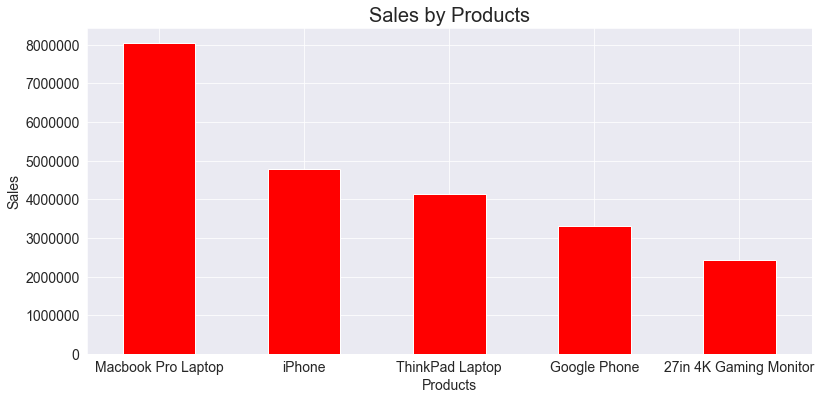

In [33]:
df4["Sales"].plot(kind="bar", figsize=(13,6), color="r")
plt.tick_params(axis="x", labelsize = 14)
plt.tick_params(axis="y", labelsize = 14)
plt.xlabel("Products", fontsize = 14)
plt.ylabel("Sales", fontsize = 14)
plt.title("Sales by Products", fontsize = 20)
plt.xticks(rotation=0)

#### Bottom 5

In [34]:
df5 = all_data.groupby("Product").sum().sort_values("Sales", ascending=False).tail()
df5.head()

,Quantity Ordered,Price Each,Month Number,Sales,Hour,Minute
Product,,,,,,
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

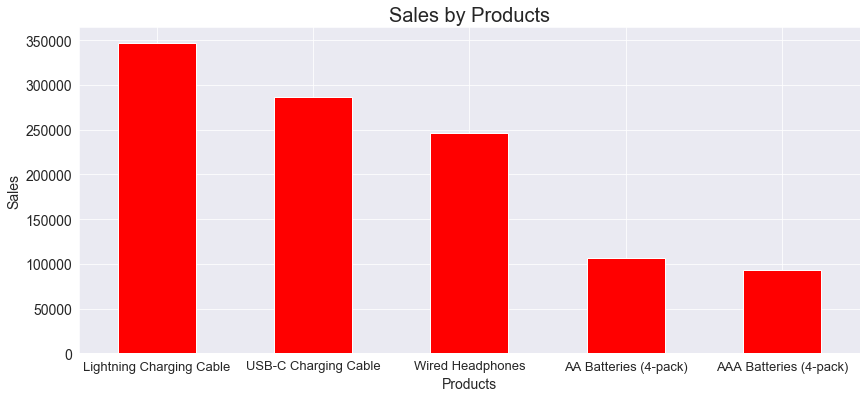

In [35]:
df5["Sales"].plot(kind="bar", figsize=(14,6), color="r")
plt.tick_params(axis="x", labelsize = 13)
plt.tick_params(axis="y", labelsize = 14)
plt.xlabel("Products", fontsize = 14)
plt.ylabel("Sales", fontsize = 14)
plt.title("Sales by Products", fontsize = 20)
plt.xticks(rotation=0)